# Linear regression excercises

$Y_{i} = \beta_{0} + \beta_{1} X_{i} + \epsilon_{i}$

- $Y_{i}$: the dependent (random) variable 
- $X_{i}$: independent variable (not random)
- $\beta_{0}, \beta_{1}$: model parameters 
- $\epsilon_{i}$: Random error, how the observation deviates from the population mean


In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load confounds table

conf_path = "../data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
conf = pd.read_csv(conf_path, delimiter="\t")

# Print head of the confounds
conf.head()

,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,white_matter_derivative1_power2,white_matter_power2,global_signal,global_signal_derivative1,...,rot_x_derivative1_power2,rot_x_power2,rot_y,rot_y_derivative1,rot_y_derivative1_power2,rot_y_power2,rot_z,rot_z_derivative1,rot_z_derivative1_power2,rot_z_power2
0,661.664060,NaN,437799.328011,NaN,582.241511,NaN,NaN,339005.177713,526.516821,NaN,...,NaN,6.261756e-06,-0.000822,NaN,NaN,6.764256e-07,-0.000621,NaN,NaN,3.860572e-07
1,644.578523,-17.085537,415481.472246,291.915569,580.923387,-1.318124,1.737452,337471.981745,521.348217,-5.168603,...,7.799363e-07,2.621841e-06,-0.000964,-0.000141,1.998802e-08,9.289683e-07,-0.000202,0.000420,1.762388e-07,4.061313e-08
2,635.412475,-9.166048,403749.013034,84.016440,580.771837,-0.151551,0.022968,337295.926190,518.360918,-2.987299,...,1.098657e-07,1.658300e-06,-0.000964,0.000000,0.000000e+00,9.289683e-07,-0.000246,-0.000045,2.020502e-09,6.075091e-08
3,634.774600,-0.637874,402938.793280,0.406884,580.034297,-0.737539,0.543964,336439.786042,518.386814,0.025895,...,9.572666e-09,1.415886e-06,-0.000884,0.000080,6.440063e-09,7.807136e-07,0.000039,0.000285,8.135210e-08,1.501245e-09
4,634.872426,0.097826,403062.997290,0.009570,579.979105,-0.055192,0.003046,336375.762760,518.626567,0.239754,...,3.370499e-07,3.713074e-07,-0.000964,-0.000080,6.440063e-09,9.289683e-07,0.000216,0.000178,3.158443e-08,4.685753e-08


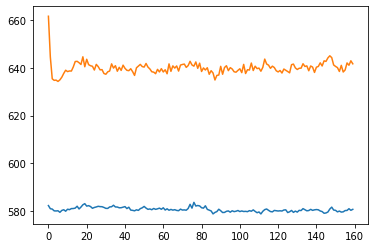

In [3]:
# Plot timeseries of BOLD signal from cerebrospinal fluid (csf) & white matter (white_matter) on one plot
wm = conf['white_matter'].values
csf = conf['csf'].values
plt.plot(wm)
plt.plot(csf)

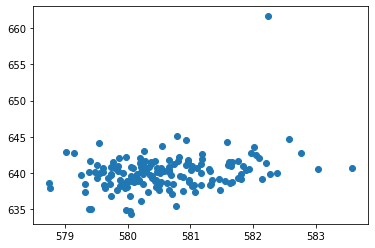

In [4]:
# Plot scatter

plt.scatter(wm, csf)

## Lets run linear regression!

In [5]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression() 
linear_regression.fit(wm.reshape(-1, 1), csf.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Print beta & intercept values

beta = linear_regression.coef_
intercept = linear_regression.intercept_ #intercept
print("Beta:", beta)
print("Intercept:", intercept)

Beta: [[0.87327878]]
Intercept: [132.98154237]


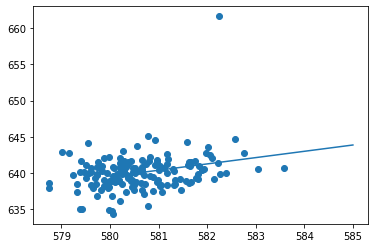

In [8]:
# Add regression line to scatterplot
import numpy as np
x = np.linspace(580,585,100) #obliczanie x 
y = beta*x+intercept #wykres funkcji ax+b
y = np.squeeze(y) #pozwala usunąć niepotrzebny wymiar (bo musi być jeden wymiar)

plt.scatter(wm, csf)
plt.plot(x,y)

## Linear regression on images


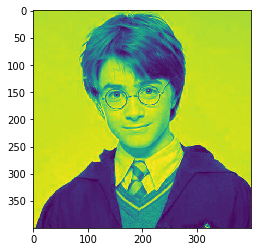

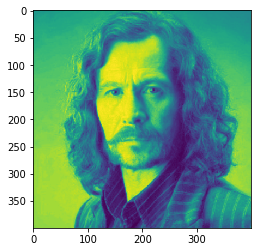

In [13]:
# Load and harry image

path = "../data/harry.npy"
harry = np.load(path)

# Plot syrius image

path2 = "../data/syrius.npy"
syrius = np.load(path2)

plt.imshow(harry)
plt.show()
plt.imshow(syrius)
plt.show()

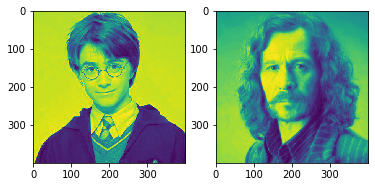

In [16]:
# Plot syrius & harry side by side

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(harry)
ax2.imshow(syrius)
plt.show()

In [17]:
# Change harry & syrius to vectors

harry_v = harry.flatten()
syrius_v = syrius.flatten()

print(harry_v.shape, syrius_v.shape)

(160000,) (160000,)


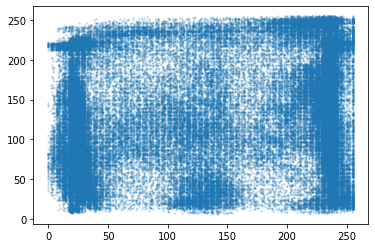

In [24]:
# Make a scatterplot

plt.scatter(harry_v, syrius_v, s=2, alpha=.2)
plt.show()

In [26]:
# Run linear regression

lr = LinearRegression()
lr.fit(harry_v.reshape(-1,1), syrius_v.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Print beta & intercept value

print(lr.coef_, lr.intercept_)

[[0.16639277]] [112.67897521]


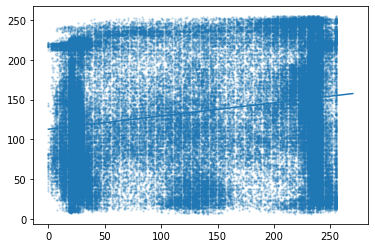

In [34]:
# Make scatter plot with overlayed regression line
beta = lr.coef_
intercept = lr.intercept_
x = np.linspace(0,270,100)
y = beta*x+intercept #wykres funkcji ax+b
y = np.squeeze(y) #pozwala usunąć niepotrzebny wymiar (bo musi być jeden wymiar)

plt.scatter(harry_v,syrius_v, s=2, alpha=.2)
plt.plot(x,y)